<a href="https://colab.research.google.com/github/samindelhi/CNN-Exercises/blob/main/Inception_Pytorch_Pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing using a Pretrained model of Inception-v3 using Pytorch.

In [1]:
import torch

import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import json

In [5]:
# Load Pretrained Inception v3 Model.
model = models.inception_v3(pretrained=True)
model.eval()  # Set to evaluation model.


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

# Image Transformations


In [6]:
# Image Transformations

def transform_image(image_path):
  transform = transforms.Compose([
      transforms.Resize((299,299)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
      ])
  image = Image.open(image_path).convert("RGB")
  return transform(image).unsqueeze(0)  # Add batch dimension




In [7]:
!wget https://raw.githubusercontent.com/pytorch/hub/refs/heads/master/imagenet_classes.txt

#Different types of classes from the Imagenet.


--2025-10-11 14:11:14--  https://raw.githubusercontent.com/pytorch/hub/refs/heads/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2025-10-11 14:11:14 (85.7 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [12]:
# Inference
def predict(image_tensor, model):
  with torch.no_grad():
    outputs = model(image_tensor)
  return torch.nn.functional.softmax(outputs, dim=1)[0]

# Load Class Labels
with open("/content/imagenet_classes.txt") as f:
  labels = [line.strip() for line in f.readlines()]






# Inferencing & Visualizing Results.


In [14]:
# Image Downloader Function

import requests
def download_image(url, filename):
  try:
    response = requests.get(url, stream=True)
    response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
    with open(filename, 'wb') as out_file:
      for chunk in response.iter_content(chunk_size=8192):
        out_file.write(chunk)
    print(f"Image downloaded successfully as {filename}")

  except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")

# Example usage:
image_url = "https://cdn.britannica.com/08/3408-050-6065D035/blue-peacock-pavo-cristatus-peahen-Indian-Males-harem-females.jpg"

output_filename = "peacock.jpg"
download_image(image_url, output_filename)

image_url = "https://cdn.britannica.com/61/100261-050-D5241944/Whooping-crane.jpg"
output_filename = "crane.jpg"
download_image(image_url, output_filename)



Image downloaded successfully as peacock.jpg
Image downloaded successfully as crane.jpg


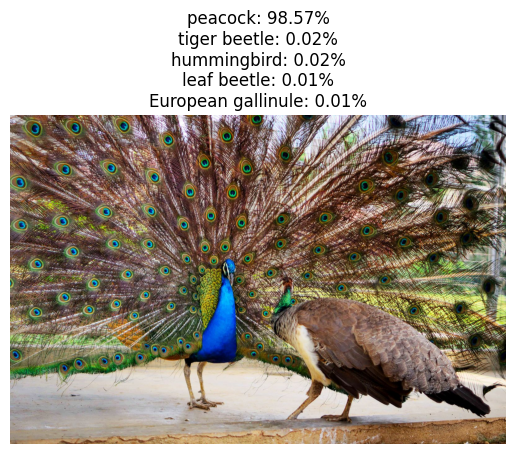

In [17]:
# Visualize Image and Prediction

def visualize(image_path, predictions, labels):
  image = Image.open(image_path)
  plt.imshow(image)
  plt.axis("off")


  #Get top 5 predictions
  top5_prob, top5_catid = torch.topk(predictions,5)
  top5_labels = [labels[i] for i in top5_catid]

  #Show predictions
  plt.title('\n'.join([f"{label}: {prob:.2%}" for label, prob in zip(top5_labels, top5_prob)]))
  plt.show()

# Example usage
image_path = "/content/peacock.jpg"
image_tensor = transform_image(image_path)
predictions = predict(image_tensor, model)
visualize(image_path, predictions, labels)





Whooping-crane.jpg
Image downloaded successfully as Whooping-crane.jpg


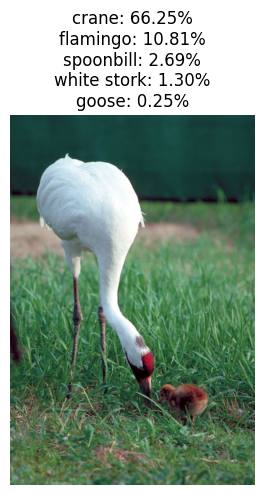

Indian-bustard-bird-species.jpg
Image downloaded successfully as Indian-bustard-bird-species.jpg


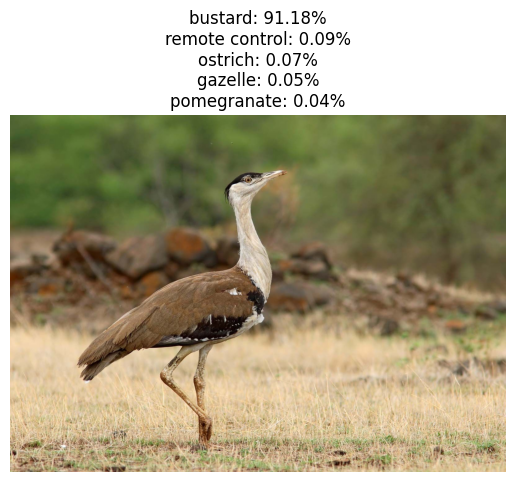

rhinoceros-hornbill-forest-Borneo-island.jpg
Image downloaded successfully as rhinoceros-hornbill-forest-Borneo-island.jpg


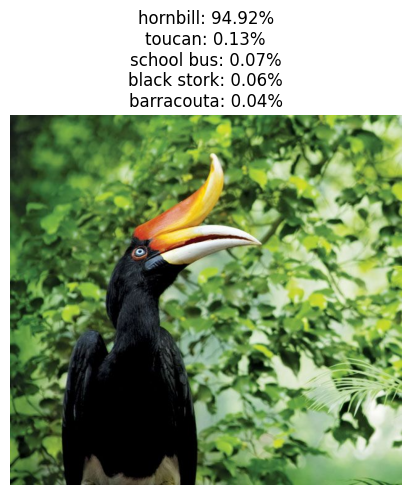

lemur.jpg
Image downloaded successfully as lemur.jpg


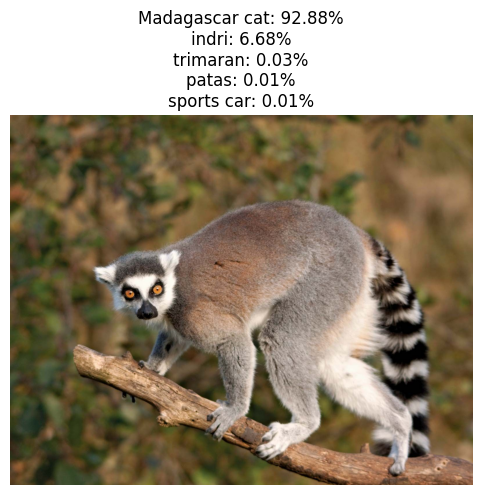

Aye-aye.jpg
Image downloaded successfully as Aye-aye.jpg


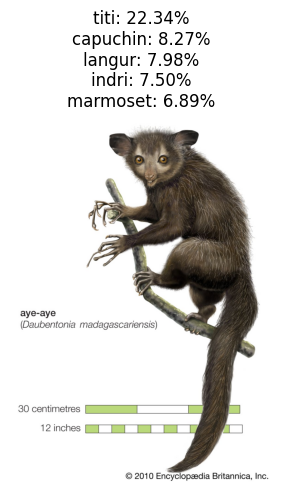

capuchin-monkey.jpg
Image downloaded successfully as capuchin-monkey.jpg


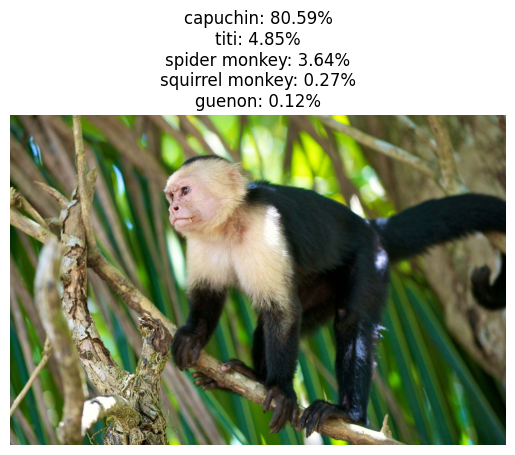

mountain-gorilla-Virunga-National-Park-Democratic-Republic.jpg
Image downloaded successfully as mountain-gorilla-Virunga-National-Park-Democratic-Republic.jpg


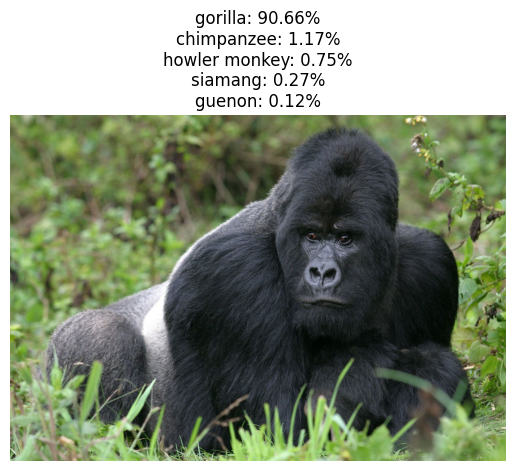

orangutan-cheek-pads.jpg
Image downloaded successfully as orangutan-cheek-pads.jpg


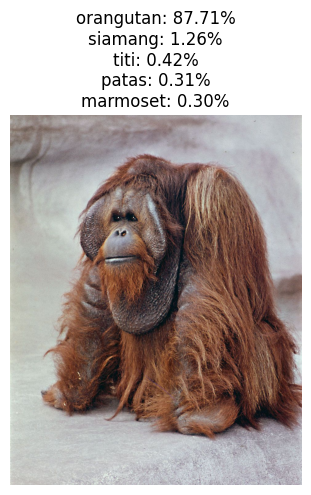

In [23]:
image_urls_paths = [
              "https://cdn.britannica.com/61/100261-050-D5241944/Whooping-crane.jpg",
              "https://cdn.britannica.com/09/157809-050-073D23F3/Indian-bustard-bird-species.jpg",
              "https://cdn.britannica.com/93/146393-050-0A1E8550/rhinoceros-hornbill-forest-Borneo-island.jpg",
              "https://cdn.britannica.com/20/154120-050-78DE15C0/lemur.jpg",
              "https://cdn.britannica.com/25/74325-050-54FD3495/Aye-aye.jpg",
              "https://cdn.britannica.com/05/181805-050-C9682415/capuchin-monkey.jpg",
              "https://cdn.britannica.com/79/20279-050-ECDF21A7/mountain-gorilla-Virunga-National-Park-Democratic-Republic.jpg",
              "https://cdn.britannica.com/51/3251-050-2433CE67/orangutan-cheek-pads.jpg"
              ]

for image_path in image_urls_paths:
  print(image_path.split('/')[-1])
  output_filename = image_path.split('/')[-1]

  download_image(image_path, output_filename)
  image_tensor = transform_image(output_filename)
  predictions = predict(image_tensor, model)
  visualize(output_filename, predictions, labels)